<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 3: прогнозирование временных рядов</center></h2>

In [ ]:
!pip install etna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.3/304.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.2/273.2 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.2/308.2 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 kB 11.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of prophet to determine which version is compatible wi

In [ ]:
import warnings
import gdown
import pandas as pd
import numpy as np
import seaborn as sns
from copy import deepcopy

warnings.filterwarnings("ignore")

В данной задаче мы будем решать одну из актуальных практических задач, с которыми, в том числе, сталкиваются разработчики ETNA - прогнозирование объема необходимой наличности в банкоматах (на примере одного устройства). Пожалуй, ни для кого не секрет, что отсутствие необходимой суммы в банкомате не делает клиента банка счастливее. В то же время, избыток заправленной в банкомат наличности приводит к упущенной выгоде - ведь, в конечном счете, эти деньги могли быть размещены в качестве краткосрочного депозита на межбанковском рынке. Для кредитной организации с обширной сетью банкоматов даже незначительное улучшение качества предсказания способно внести значительный вклад в прибыльность этой ветки бизнеса. 

Мы будем использовать дневные данные реального банкомата хоть и не с российского рынка, но очень схожего с ним - турецкого. Скачаем и загрузим их:

In [ ]:
url = 'https://raw.githubusercontent.com/andrei-egorov/ml_se_seminars/master/atm_daily_cash.csv'
output = 'atm_daily_cash.csv'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

df = pd.read_csv('atm_daily_cash.csv')
df = df[4:] #лучше избавиться от нескольких пропущенных значений в начале сразу,
            #могут доставлять ненужные лишние проблемы

Downloading...
From: https://raw.githubusercontent.com/andrei-egorov/ml_se_seminars/master/atm_daily_cash.csv
To: /content/atm_daily_cash.csv
26.1kB [00:00, 1.32MB/s]                   


Взглянем на то, что представляют из себя данные:

In [ ]:
df.head()

Date   CashIn  CashOut
4  1/5/2016  20840.0  22200.0
5  1/6/2016  28460.0  18810.0
6  1/7/2016  19250.0  23210.0
7  1/8/2016  49770.0   4350.0
8  1/9/2016      NaN      NaN

В нашем распоряжении пополнения и изъятия; нас интересует нетто. Для этого будем учитывать изъятия со знаком минус, а нетто определим как сумму (такое представление пригодится нам в дальнейшем).

In [ ]:
df['CashOut'] = -df['CashOut']
df['target'] = df['CashIn'] + df['CashOut']
df.head()

Date   CashIn  CashOut   target
4  1/5/2016  20840.0 -22200.0  -1360.0
5  1/6/2016  28460.0 -18810.0   9650.0
6  1/7/2016  19250.0 -23210.0  -3960.0
7  1/8/2016  49770.0  -4350.0  45420.0
8  1/9/2016      NaN      NaN      NaN

In [ ]:
from etna.datasets import TSDataset

In [ ]:
df_temp = pd.melt(df,["Date"],["CashIn", "CashOut", "target"],  "segment", "target")
df_temp = df_temp.rename(columns = {"Date":"timestamp"})
df_temp = TSDataset.to_dataset(df_temp)
df1 = TSDataset(df_temp, freq = "D")
df1.head()

segment      CashIn  CashOut   target
feature      target   target   target
timestamp                            
2016-01-05  20840.0 -22200.0  -1360.0
2016-01-06  28460.0 -18810.0   9650.0
2016-01-07  19250.0 -23210.0  -3960.0
2016-01-08  49770.0  -4350.0  45420.0
2016-01-09      NaN      NaN      NaN

### Задание 1. EDA (1 балл)

Проведите разведывательный анализ данных - постройте графики, на которых можно судить о наличии тренда, сезонности и прочих зависимостей. Проанализируйте корреляции. Какие выводы вы можете сделать?

In [ ]:
from etna.analysis import (
    cross_corr_plot,
    distribution_plot,
    acf_plot,
    plot_correlation_matrix,
)
from etna.analysis import plot_trend
from etna.transforms import LinearTrendTransform

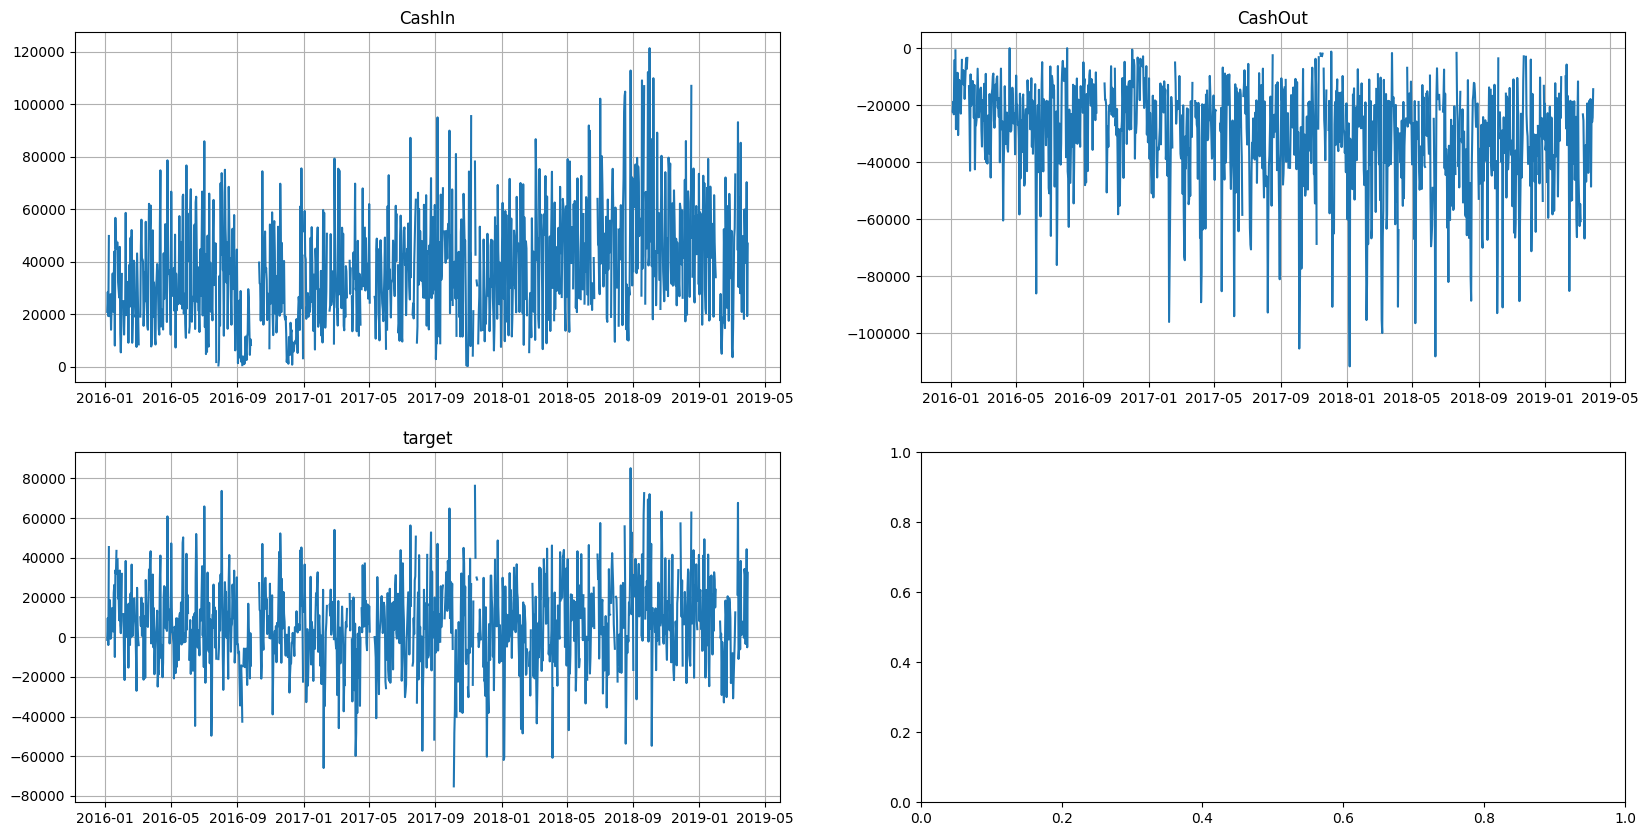

In [ ]:
#https://etna-docs.netlify.app/tutorials/eda
df1.plot()

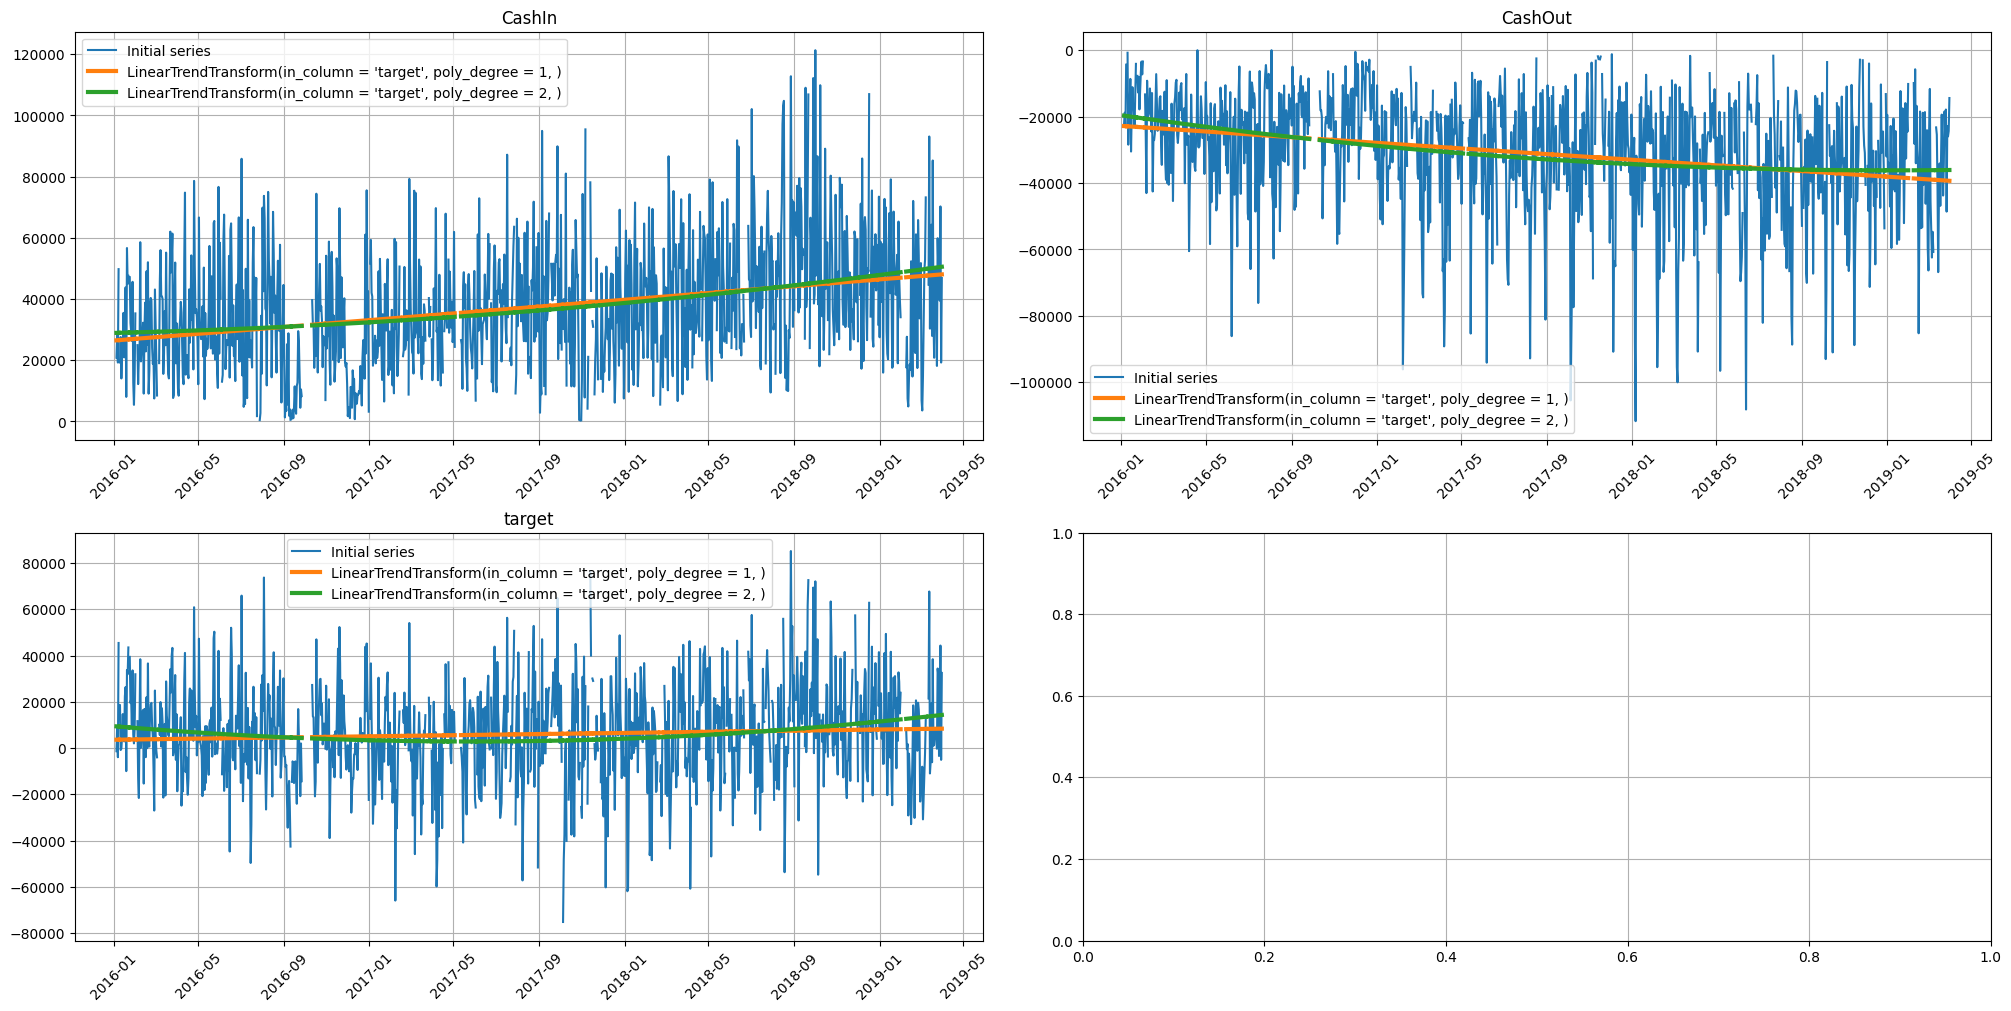

In [ ]:
trends = [
    LinearTrendTransform(in_column="target", poly_degree=1),
    LinearTrendTransform(in_column="target", poly_degree=2),
]
plot_trend(df1, trend_transform=trends)


In [ ]:
from etna.analysis import plot_periodogram, stl_plot, seasonal_plot

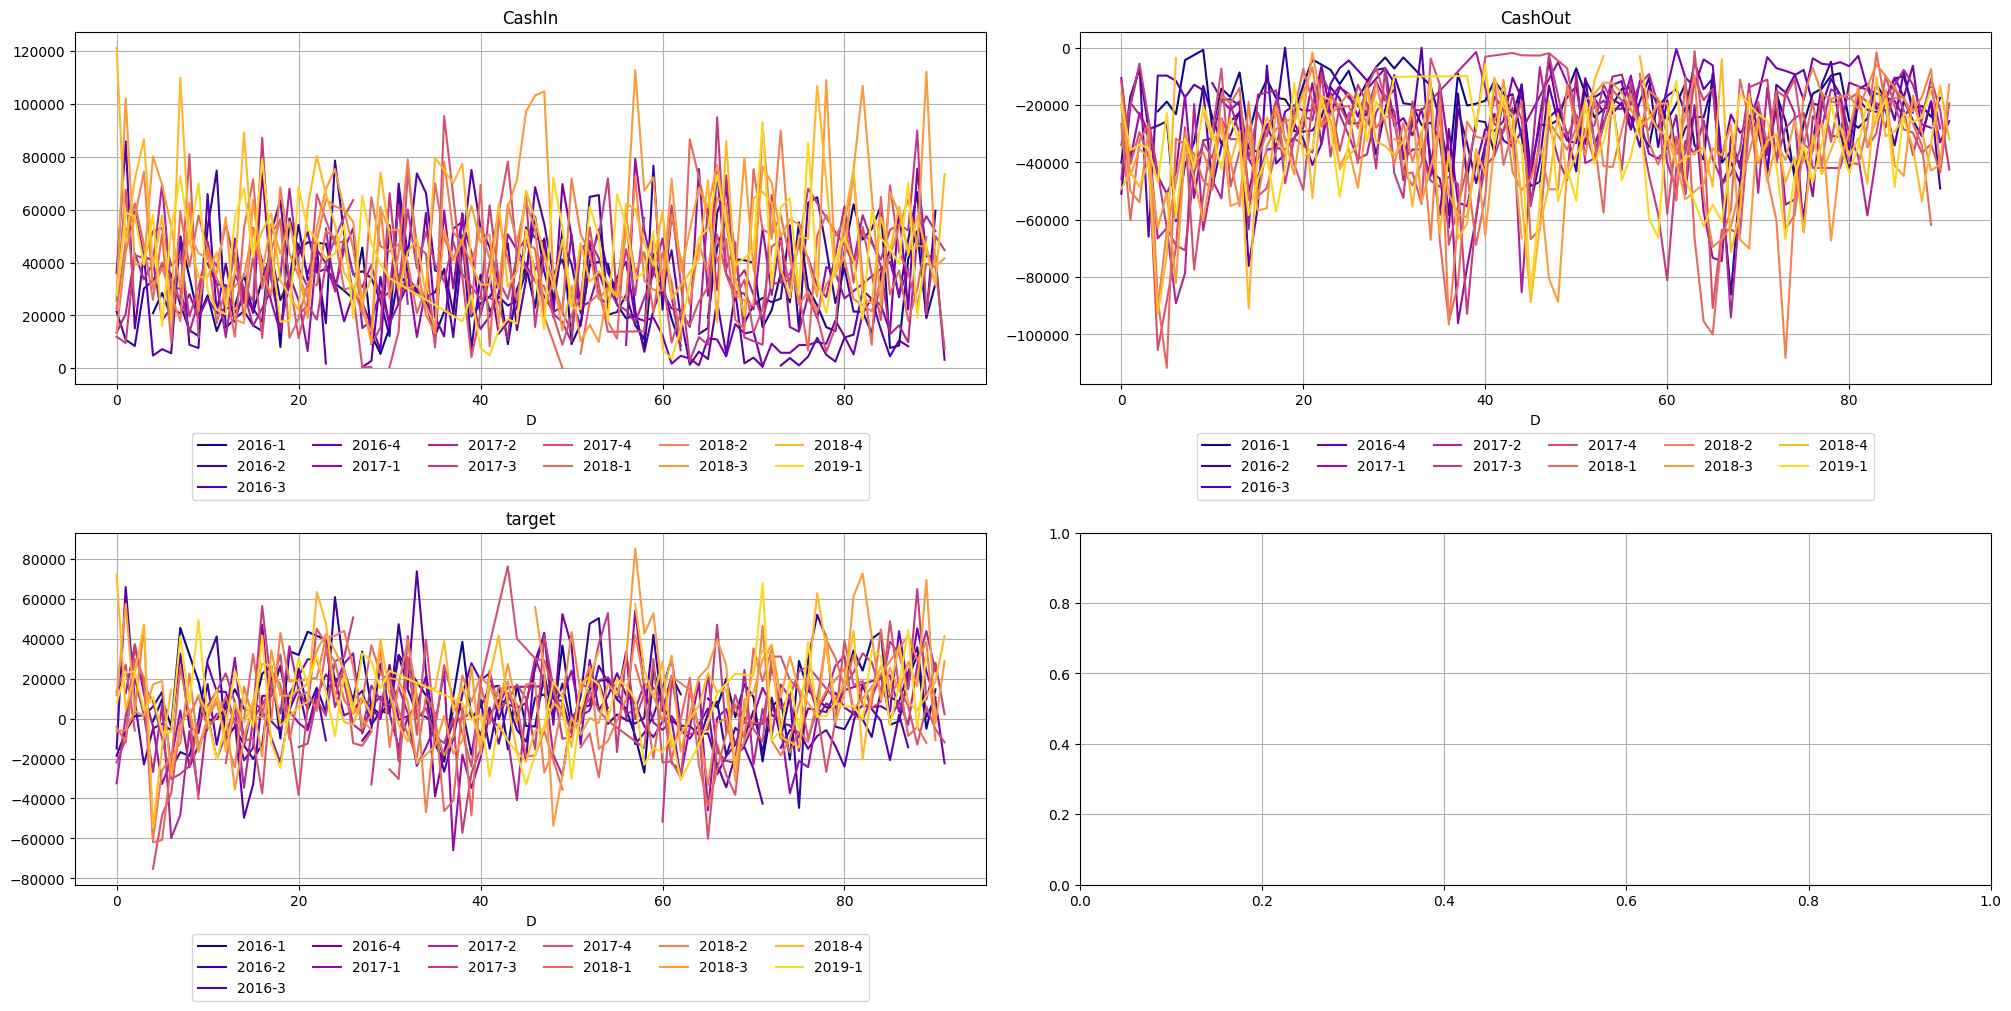

In [ ]:
seasonal_plot(df1, cycle="quarter")

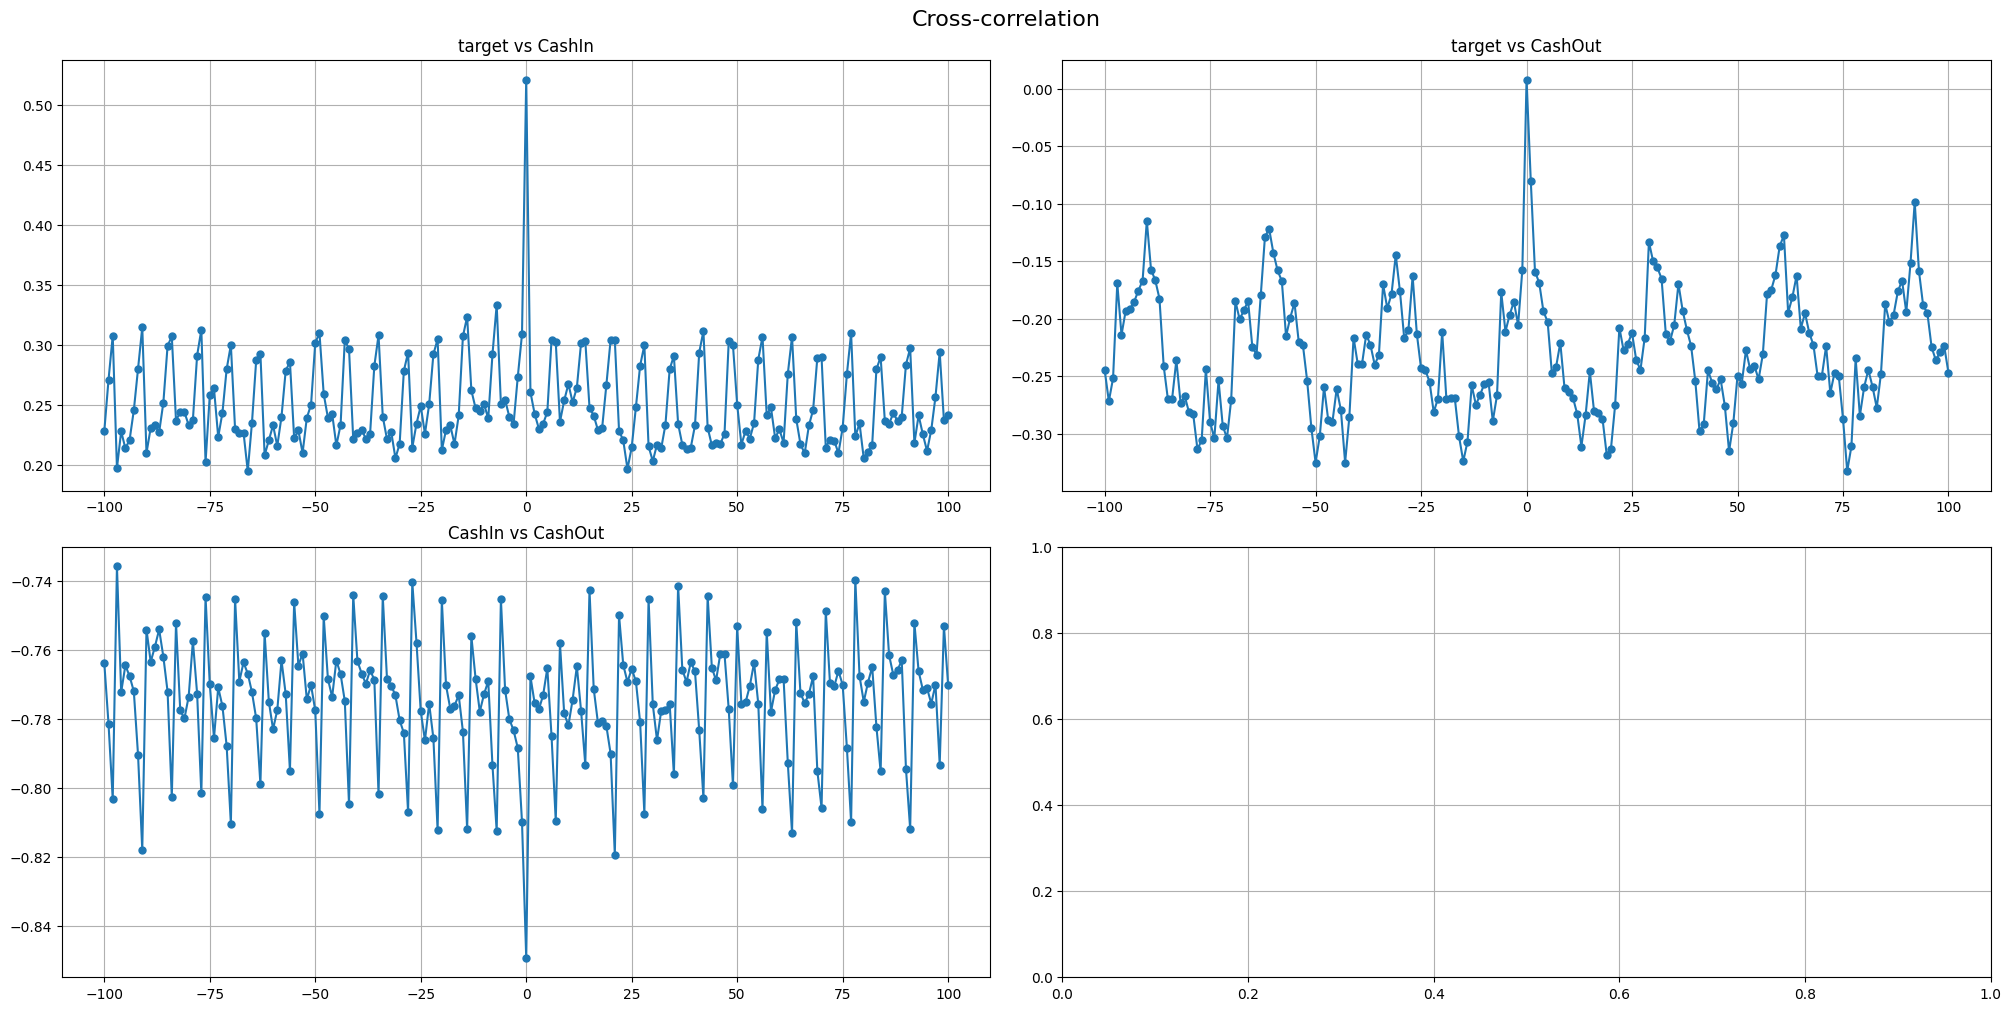

In [ ]:
cross_corr_plot(df1, maxlags=100)

### Задание 2. Приведение в формат multi-segment (0.75 балла)

Теперь нам предстоит (в первый раз) привести данные к формату, в котором с ними будет возможно работать средствами ETNA. Вначале мы будем рассматривать и предсказывать наши данные как мульти-сегментные. Чтобы привести данные в соответствующий формат, вам пригодится функция `pd.melt`. На выходе у нас должен получиться объект `TSDataset`. Поскольку мы будем смотреть на данные не только в этом разрезе, лучше не менять исходный датафрейм и работать с копией.

In [ ]:
from etna.datasets import TSDataset

In [ ]:
df_temp = pd.melt(df,["Date"],["CashIn", "CashOut", "target"],  "segment", "target")
df_temp.head()

Date segment   target
0  1/5/2016  CashIn  20840.0
1  1/6/2016  CashIn  28460.0
2  1/7/2016  CashIn  19250.0
3  1/8/2016  CashIn  49770.0
4  1/9/2016  CashIn      NaN

In [ ]:
df_temp = df_temp.rename(columns = {"Date":"timestamp"})
df_temp = TSDataset.to_dataset(df_temp)

In [ ]:
df1 = TSDataset(df_temp, freq = "D")

In [ ]:
df1.head()

segment      CashIn  CashOut   target
feature      target   target   target
timestamp                            
2016-01-05  20840.0 -22200.0  -1360.0
2016-01-06  28460.0 -18810.0   9650.0
2016-01-07  19250.0 -23210.0  -3960.0
2016-01-08  49770.0  -4350.0  45420.0
2016-01-09      NaN      NaN      NaN

### Задание 3. Работа с пропущенными значениями и аутлаерами (1 балл)

Проанализируйте, есть ли в данных пропущенные значения, и подберите оптимальный метод их заполнения средствами ETNA. Какие методы вы выберете и почему? Совет: возможно, лучше сохранить заполненные данные в отдельный объект, поскольку некоторые модели заполняют пропуски встроенными методами, и подача на вход "сырых" данных (на языке временных рядов это данные с нерегулярными интервалами) может принести лучший результат.

Импорты всех необходимых компонент произведите самостоятельно.

In [ ]:
#https://etna-docs.netlify.app/tutorials/outliers.html
from etna.analysis import (
    get_anomalies_median,
    get_anomalies_density,
    get_anomalies_prediction_interval,
    get_anomalies_hist,
)
from etna.analysis import plot_anomalies

Проверьте ряды на наличие аутлаеров, и очистите их соответствующим образом. Обоснуйте выбор.

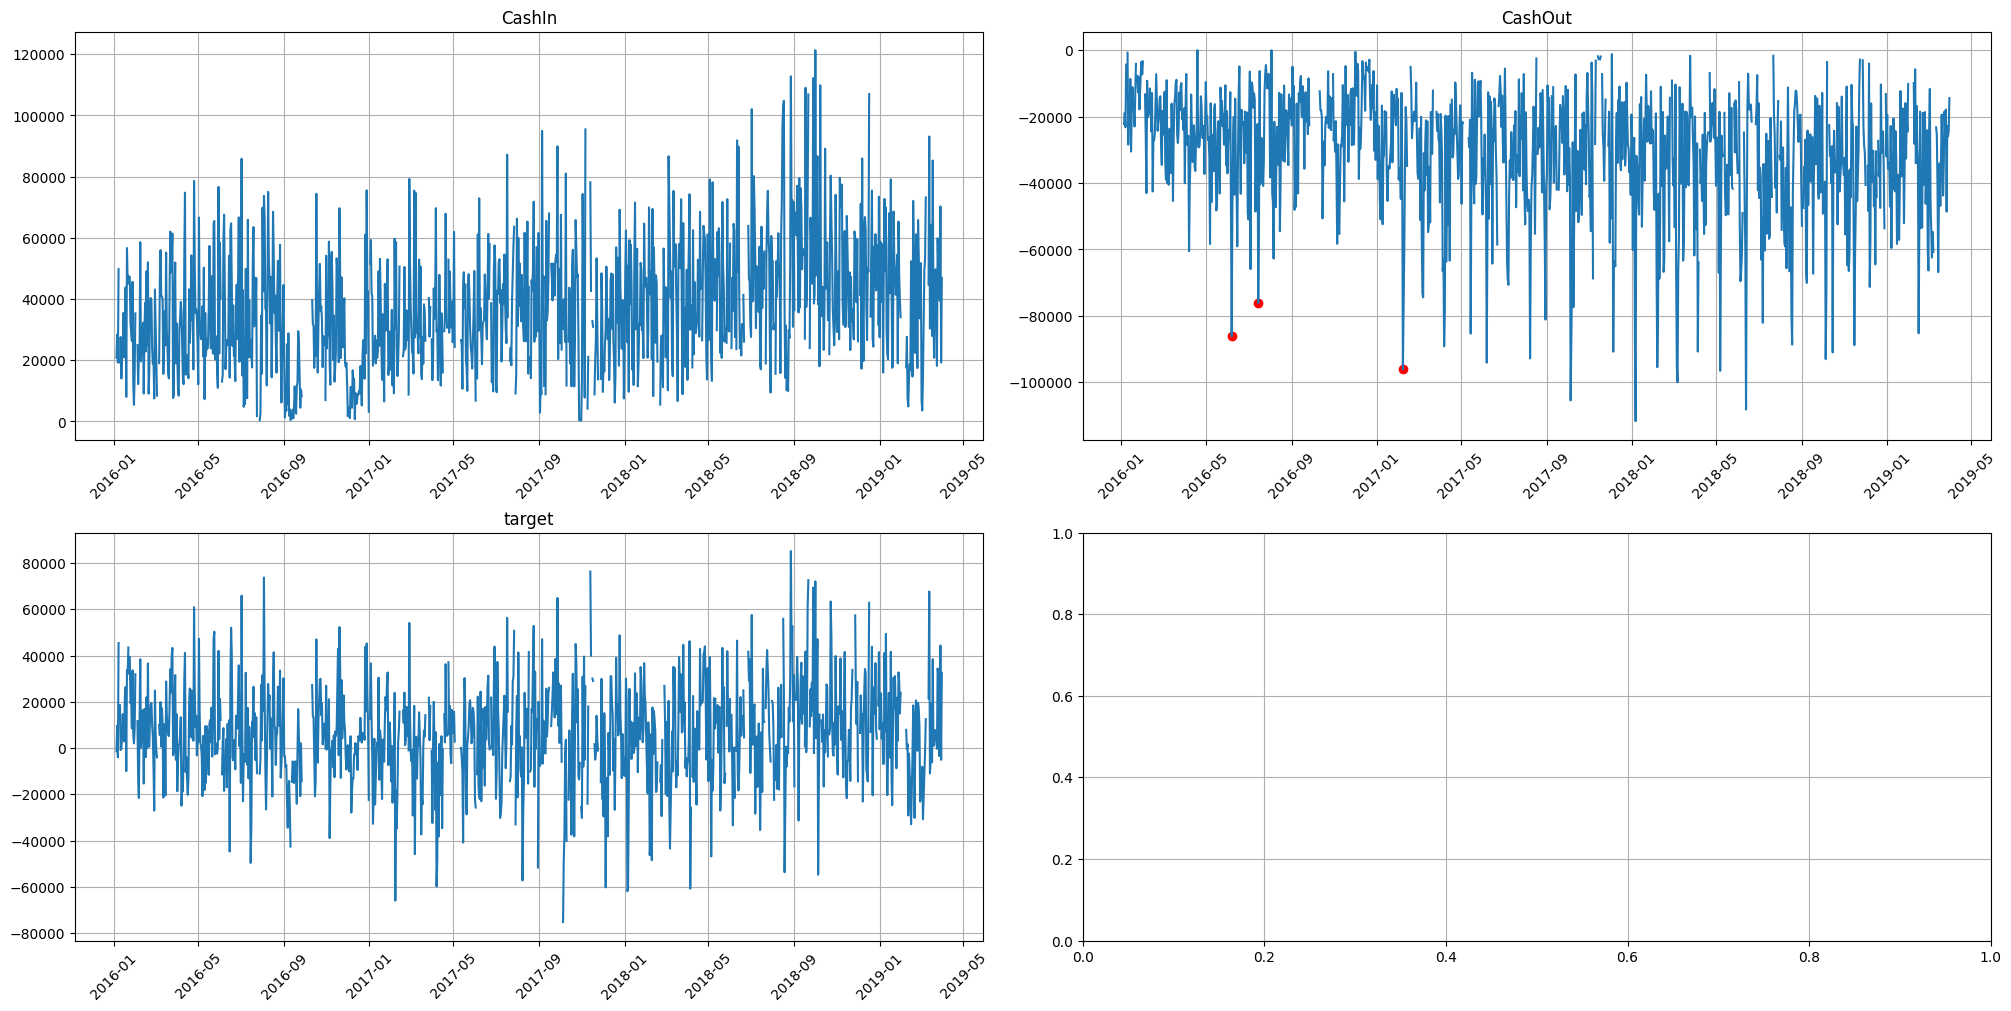

In [ ]:
anomaly_dict = get_anomalies_median(df1, window_size=100)
plot_anomalies(df1, anomaly_dict)

In [ ]:
from etna.transforms import MedianOutliersTransform, TimeSeriesImputerTransform
from etna.analysis import plot_imputation

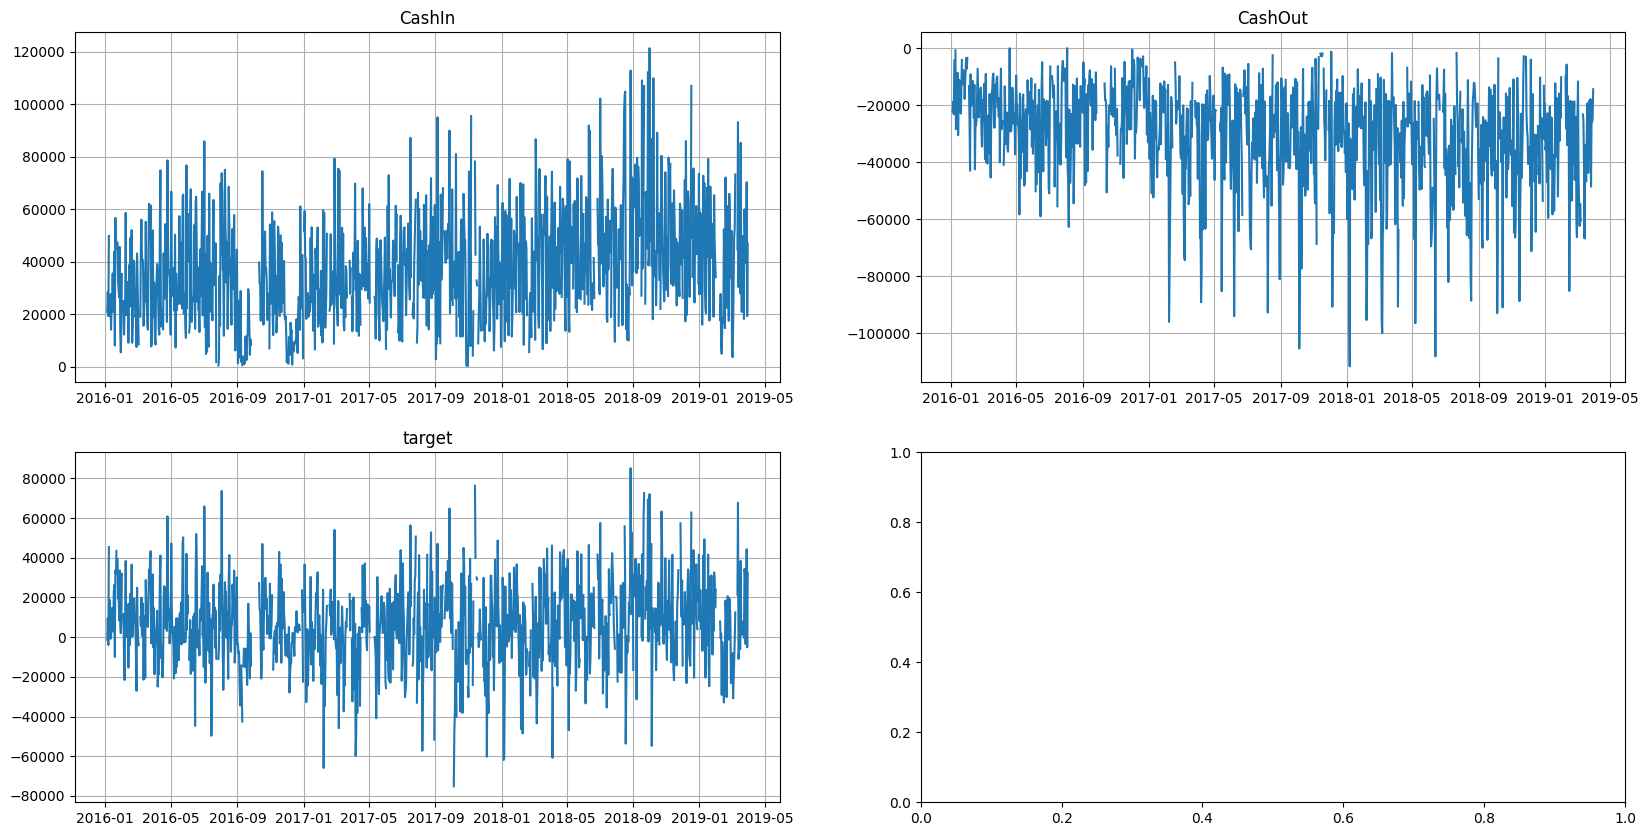

In [ ]:
best_params = {"window_size": 60, "alpha": 2.35}
outliers_remover = MedianOutliersTransform(in_column="target", **best_params)

df1.fit_transform([outliers_remover])
df1.plot()

In [ ]:
outliers_imputer = TimeSeriesImputerTransform(in_column="target", strategy="running_mean", window=30)
df1.fit_transform([outliers_imputer])


### Задание 4. Построение мультисегментной модели (1.25 балла)

Постройте мульти-сегментную модель на основе Prophet, и оцените качество по SMAPE на кросс-валидации. В качестве горизонта предсказания возьмите 5 дней - этого же горизонта будем придерживаться и в дальнейшем.

Отрисуйте получившийся прогноз.

In [ ]:
#https://etna-docs.netlify.app/tutorials/outliers.html

In [ ]:
from etna.pipeline import Pipeline
from etna.models import ProphetModel
from etna.metrics import SMAPE, MAE, MSE
from etna.analysis import plot_backtest

In [ ]:
HORIZON = 5

In [ ]:
def get_metrics(forecast, test):
    """Compute the metrics on forecast"""
    metrics = {"MAE": MAE(), "MSE": MSE(), "SMAPE": SMAPE()}
    results = dict()
    for name, metric in metrics.items():
        results[name] = metric(y_true=test, y_pred=forecast)["target"]
    return results

In [ ]:
train, test = df1.train_test_split(
        train_start="2016-01-05",
        train_end="2016-07-10",
        test_start="2016-07-11",
        test_end="2016-07-20",
    )


Исходя из статистики по каждому ряду, какой можно сделать вывод о том, как лучше предсказывать итоговое значение? Посчитайте то же самое исходя из MAE.

In [ ]:
pipeline = Pipeline(model = ProphetModel(), transforms = [], horizon=HORIZON)

In [ ]:
metrics_df, forecast_df, fold_info_df = pipeline.backtest(
    ts=df1, metrics=[MAE(), MSE(), SMAPE()]
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv1ev0eml/2slueikm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv1ev0eml/fx8v5ltn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69989', 'data', 'file=/tmp/tmpv1ev0eml/2slueikm.json', 'init=/tmp/tmpv1ev0eml/fx8v5ltn.json', 'output', 'file=/tmp/tmpc5gak0yk/prophet_model-20230512142720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True t

In [ ]:
metrics_df.head()

segment           MAE           MSE      SMAPE  fold_number
2  CashIn  13453.123662  3.216178e+08  26.535587            0
2  CashIn  19137.137520  4.695805e+08  34.057901            1
2  CashIn  20744.054029  5.223540e+08  46.033391            2
2  CashIn   6740.159479  7.137179e+07  19.305679            3
2  CashIn  15868.979721  2.800700e+08  38.299636            4

In [ ]:
forecast_df.head()

segment         CashIn                   CashOut                    target  \
feature    fold_number        target fold_number        target fold_number   
timestamp                                                                    
2019-03-07           0  52701.004453           0 -43015.580057           0   
2019-03-08           0  51602.881454           0 -47011.299990           0   
2019-03-09           0  45398.376095           0 -46537.527234           0   
2019-03-10           0  36071.261875           0 -29812.689282           0   
2019-03-11           0  66448.414079           0 -46895.070225           0   

segment                   
feature           target  
timestamp                 
2019-03-07  10498.917659  
2019-03-08   5655.376302  
2019-03-09    422.177049  
2019-03-10   7605.102800  
2019-03-11  19337.264922

In [ ]:
fold_info_df.head()

train_start_time train_end_time test_start_time test_end_time  fold_number
0       2016-01-05     2019-03-06      2019-03-07    2019-03-11            0
0       2016-01-05     2019-03-11      2019-03-12    2019-03-16            1
0       2016-01-05     2019-03-16      2019-03-17    2019-03-21            2
0       2016-01-05     2019-03-21      2019-03-22    2019-03-26            3
0       2016-01-05     2019-03-26      2019-03-27    2019-03-31            4

### Задание 5. Иерархический временной ряд (2 балла)

Вопрос, поставленный в прошлом задании, тем не менее, естественным образом подводит нас к концепции **иерархического временного ряда** (когда один ряд состоит из других в качестве компонент). Это полезная концепция, которая может встретиться во многих задачах. В этом задании вам предстоит самостоятельно разобраться в деталях ее реализации в ETNA с использованием справочных материалов, предоставляемых библиотекой (как это часто бывает на практике). Они содержатся по следующей ссылке:

https://github.com/tinkoff-ai/etna/blob/master/examples/hierarchical_pipeline.ipynb

На выходе из первой части задания необходимо получить `TSDataset` с иерархической структурой, а также соответствующий реконсилятор, который позволит собирать искомый ряд из составных компонент. Классы, которые вам понадобятся, импортированы ниже.

In [ ]:
from etna.datasets import HierarchicalStructure
from etna.pipeline import HierarchicalPipeline
from etna.reconciliation import BottomUpReconciliator

In [ ]:
#https://etna-docs.netlify.app/tutorials/hierarchical_pipeline.html

In [ ]:
hier_struct = HierarchicalStructure(level_structure={"total":["CashIn", "CashOut", "target"]}, level_names=["total", "reason"])
df_hier = TSDataset(df=df_temp, freq="D", hierarchical_structure=hier_struct)
df_hier.head()

segment      CashIn  CashOut   target
feature      target   target   target
timestamp                            
2016-01-05  20840.0 -22200.0  -1360.0
2016-01-06  28460.0 -18810.0   9650.0
2016-01-07  19250.0 -23210.0  -3960.0
2016-01-08  49770.0  -4350.0  45420.0
2016-01-09      NaN      NaN      NaN

Во второй части задания примените найденные на предыдущих этапах преобразования очистку от аутлаеров уже к иерархическому датасету, и запустите на нем Prophet с MAE на кросс-валидации.

In [ ]:
df_hier.fit_transform([outliers_remover])

In [ ]:
pipeline_hier = Pipeline(model = ProphetModel(), transforms = [], horizon=HORIZON)

In [ ]:
metrics_hier, forecast_hier, fold_info_hier = pipeline_hier.backtest(
    ts=df_hier, metrics=[MAE()], n_folds=3
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv1ev0eml/bw0mspoe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv1ev0eml/gz97b0gl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70828', 'data', 'file=/tmp/tmpv1ev0eml/bw0mspoe.json', 'init=/tmp/tmpv1ev0eml/gz97b0gl.json', 'output', 'file=/tmp/tmpnxul4fyb/prophet_model-20230512142749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True t

In [ ]:
metrics_hier.head()

segment           MAE  fold_number
0   CashIn  20025.168954            0
0   CashIn   5707.504994            1
0   CashIn  15810.138814            2
1  CashOut   9917.150568            0
1  CashOut  13129.416267            1

In [ ]:
forecast_hier.head()

segment         CashIn                   CashOut                    target  \
feature    fold_number        target fold_number        target fold_number   
timestamp                                                                    
2019-03-17           0  36121.486599           0 -27613.338220           0   
2019-03-18           0  68272.471846           0 -46468.293432           0   
2019-03-19           0  57270.781236           0 -43941.189509           0   
2019-03-20           0  58652.435144           0 -42679.895423           0   
2019-03-21           0  55123.613637           0 -41926.299561           0   

segment                   
feature           target  
timestamp                 
2019-03-17   9394.200538  
2019-03-18  21366.674487  
2019-03-19  13670.915122  
2019-03-20  16212.298546  
2019-03-21  13426.469136

In [ ]:
fold_info_hier.head()

train_start_time train_end_time test_start_time test_end_time  fold_number
0       2016-01-05     2019-03-16      2019-03-17    2019-03-21            0
0       2016-01-05     2019-03-21      2019-03-22    2019-03-26            1
0       2016-01-05     2019-03-26      2019-03-27    2019-03-31            2

### Задание 6. Построение признаков (1.5 балла)

Вернемся к нашему исходному мультисегментному ряду - теперь поработаем с моделями, которые требуют построения признаков - `ARIMA` и `CatBoost`. Построим для них признаки, и попробуем при помощи них добиться улучшения качества. Из обязательного: 1) постройте графики автокорреляции и при помощи них обоснуйте выбор лаговых признаков 2) для катбуста включите в признаки результаты STL разложения. Кроме этого, подумайте на экспертном уровне, какие закономерности могут присутствовать в пополнени наличности из банкомата? Снятии? Что из этого кажется более предсказуемым, и почему? Cделайте соответствующие признаки, и снабдите их кратким комментарием.

После этого, обучите на получившихся признаках модели.

Ниже приведены импорты, которые вам точно понадобятся - к ним необходимо добавить те инструменты, которые вы дополнительно решите использовать в анализе.

In [ ]:
from etna.analysis import  stl_plot
from etna.ensembles import DirectEnsemble, StackingEnsemble, VotingEnsemble
from etna.models import (CatBoostMultiSegmentModel,
                         AutoARIMAModel)
from etna.transforms import STLTransform, LagTransform, SegmentEncoderTransform

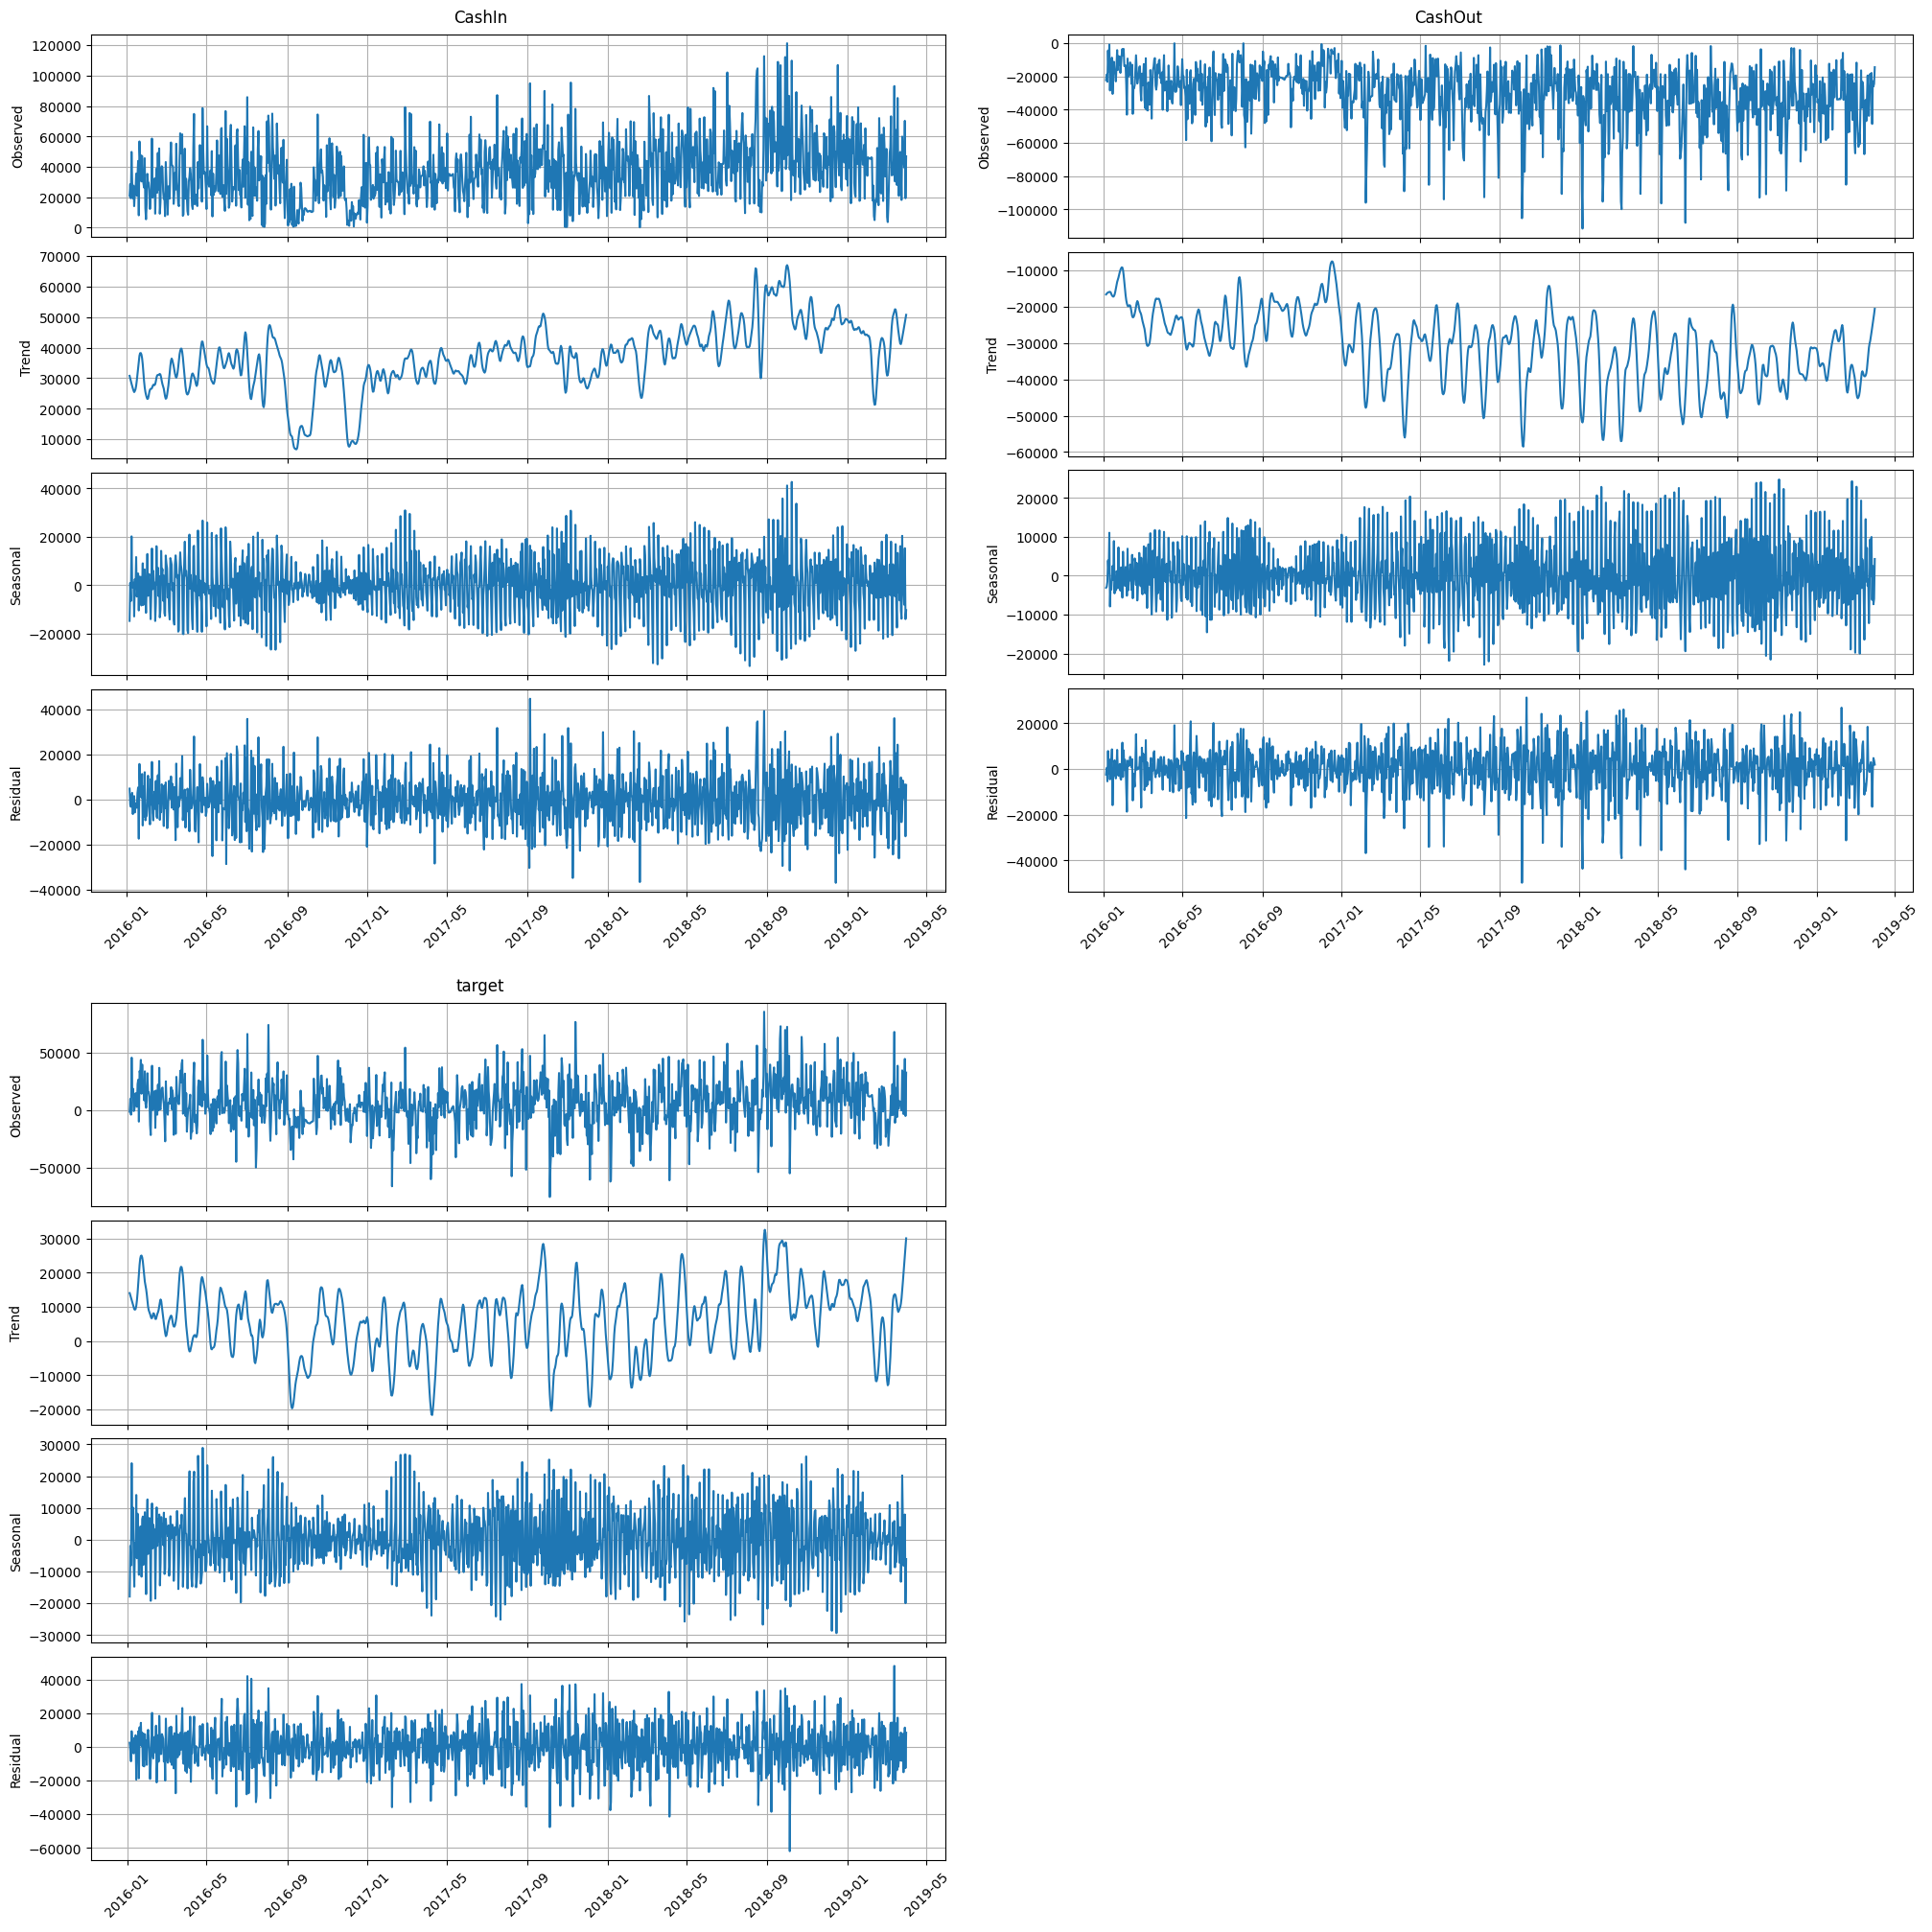

In [ ]:
stl_plot(df1, period = 7)

In [ ]:
transforms=[TimeSeriesImputerTransform(in_column="target", strategy="running_mean", window=7), LagTransform(in_column="target", lags=[7], out_column="target_lag"),
STLTransform(in_column="target", period=7, model="arima"),SegmentEncoderTransform()]
arima_pipeline = Pipeline(model=AutoARIMAModel(), transforms = transforms, horizon=HORIZON)


In [ ]:
arima_metrics, arima_forecasts, _ = arima_pipeline.backtest(df1, metrics=[SMAPE(), MAE()], n_folds=2, aggregate_metrics=True)
arima_metrics.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   56.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   56.1s finished


segment       SMAPE           MAE
0   CashIn   31.677988  13039.499153
1  CashOut   32.446976   9428.218435
2   target  142.175073  20006.305076

In [ ]:
arima_metrics.head()

segment       SMAPE           MAE
0   CashIn   31.677988  13039.499153
1  CashOut   32.446976   9428.218435
2   target  142.175073  20006.305076

In [ ]:
cat_pipeline = Pipeline(model=CatBoostMultiSegmentModel(), transforms=transforms, horizon=HORIZON)


In [ ]:
cat_metrics_df, cat_forecasts_df, _ = cat_pipeline.backtest(df1, metrics=[SMAPE(), MAE()], n_folds=3, aggregate_metrics=True)
cat_metrics_df.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.8s finished


segment       SMAPE           MAE
0   CashIn   38.557520  17377.132782
1  CashOut   39.003409  12049.581535
2   target  143.461995  19874.625249

In [ ]:
cat_metrics_df.head()

segment       SMAPE           MAE
0   CashIn   38.557520  17377.132782
1  CashOut   39.003409  12049.581535
2   target  143.461995  19874.625249

### Задание 7. Стратегии прогнозирования (1.25 балла)

Как нам известно по семинарским занятиям, при построении прогноза на горизонте дальше следующего наблюдения перед нами встает задача определиться со стратегией генерации прогноза. Попробуйте разные стратегии на нашем горизонте из 5 дней (прямая, рекурсивная, смешанная dirrec). Какая стратегия в совокупности с какой моделью дает лучший результат?

Учитывайте особенности, которые некоторые стратегии могут накладывать на признаки (в частности, на лаговые переменные).

При необходимости, в смешанном методе пользуйтесь упрощенной схемой спецификации моделей/преобразований.

In [ ]:
from etna.pipeline import AutoRegressivePipeline, Pipeline, assemble_pipelines
from etna.ensembles import DirectEnsemble

In [ ]:
reg_pipeline = AutoRegressivePipeline(model=CatBoostMultiSegmentModel(), transforms=transforms, horizon=HORIZON)

In [ ]:
metrics_reg_df, forecast_reg_df, _ = reg_pipeline.backtest(ts=df1, metrics=[SMAPE(), MAE(), ], aggregate_metrics=True)
metrics_reg_df.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   16.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.5s finished


segment       SMAPE           MAE
0   CashIn   45.742207  20266.831165
1  CashOut   35.077074  12031.600601
2   target  152.491204  23172.835704

In [ ]:
metrics_reg_df.head()

segment       SMAPE           MAE
0   CashIn   45.742207  20266.831165
1  CashOut   35.077074  12031.600601
2   target  152.491204  23172.835704

### Задание 8. Ансамбли (1.25 балла)

Чтобы не выбирать лучшую модель, мы можем использовать преимущества каждой - давайте объединим все наши наработки в ансамбль. Попробуйте различные опции ансамблирования, и выберите ту, которая работает лучше всего (не забывайте, что внутри каждого ансамбля у нас тоже есть параметры, которые мы можем варьировать - веса в voting, включаемые признаки в stacking).

In [ ]:
from etna.ensembles import StackingEnsemble, VotingEnsemble

In [ ]:
cat_pipeline = Pipeline( model=CatBoostMultiSegmentModel(), transforms=transforms, horizon=HORIZON)
arima_pipeline = Pipeline( model=AutoARIMAModel(), transforms=[], horizon=HORIZON)
proph_pipeline = Pipeline(model = ProphetModel(), transforms = [], horizon=HORIZON)

In [ ]:
ve = VotingEnsemble(pipelines=[cat_pipeline, arima_pipeline, proph_pipeline], weights=[1, 9, 4], n_jobs=4)

In [ ]:
voting_ensamble_metrics = ve.backtest(ts=df1, metrics=[MAE(), MSE(), SMAPE()], n_folds=3, aggregate_metrics=True, n_jobs=2,)

voting_ensamble_metrics[0]

[Parallel(n_jobs=2)]: Using backend MultiprocessingBackend with 2 concurrent workers.
[Parallel(n_jobs=4)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=4)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:  3.5min remaining:    0.0s
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv1ev0eml/3tp17kik.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv1ev0eml/wi6jahpy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93914', 'data', 'file=/tmp/tmpv1ev0eml/3tp17kik.json', 'init=/tmp/tmpv1ev0eml/wi6jahpy

segment           MAE           MSE       SMAPE
0   CashIn  11943.186385  2.171703e+08   29.617000
1  CashOut  10804.844141  1.520455e+08   35.747652
2   target  14546.856105  3.132699e+08  118.455882

In [ ]:
voting_ensamble_metrics[0]

segment           MAE           MSE       SMAPE
0   CashIn  11943.186385  2.171703e+08   29.617000
1  CashOut  10804.844141  1.520455e+08   35.747652
2   target  14546.856105  3.132699e+08  118.455882

### Задание 9*. Трансформер (бонус 2 балла)

Для желающих протестировать мощь трансформенных моделей предлагается "завести" модель из второго семинара по временным рядам на текущем датасете. На этот раз абсолютно все необходимые импорты и зависимости подгружаются на ваше усмотрение. Удалось ли вам улучшить качество по сравнению с классическими моделями / моделями на основе ML? Что бы вы предпочли внедрить в production?

*NB:* все, конечно, прекрасно знают механизм работы бонусных заданий, но порядка ряди прописать дисклеймер должны - итоговый балл за домашнее задание ставится по формуле min(10, ваш суммарный балл за задания).

In [ ]:
#YOUR CODE HERE#